# IST718 Final Project Alex Bernal

* Objectives:
    1. Obtain, Clean and Explain Data Structures and elements
    2. Scrub Data
    3. Explore Data : Descriptive Stats, Summarization, Visualizations
    4. Model Relationships
    5. Interpret the data,Communicate Results
    6. Select 
* Title Page with Summary of Findings and recommendations
* Specification - Specify Problem, hypotheses and data for this analysis
* Observation - What can you conclude from your observation and visualiztions?
* Analysis - What Types of Analysis did you use. How did you arrive at the models you recommend?
* Recommendation?
* References
* Appendices


Buisness Problem : Client is a Real Estate Investment Company and part of there business is to try 
and predict the fair market price of a property before they put it on the market. They currently use
a third-pary appraisal company, but the data form them is very subjective and varies greatly from actual 
transaction prices, some off by 70,000 The Task is to build our own price prediction model with less 
error than 70,000.
* Method to use : Regression
    

In [172]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

Print function ready to serve.


# Import Data, Data Exploration

In [173]:
# Load real estate data from CSV
df = pd.read_csv('real_estate_data.csv')
df.shape

(1883, 26)

In [174]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [175]:
# Display first 5 rows of df
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1657.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000
mean,422839.808,3.421,2.580,2329.399,1982.964,13392.620,1.000,40.210,4.505,5.075,5.325,40.802,3.394,23.417,15.835,38.601,69.092,65.086,466.777,140.454,6.503,2.793,2007.112
std,151462.593,1.069,0.946,1336.992,20.296,44949.304,0.000,46.867,4.491,8.465,7.539,53.539,4.700,25.777,17.668,6.634,19.660,16.953,231.657,72.930,1.996,0.505,5.197
min,200000.000,1.000,1.000,500.000,1880.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,1993.000
25%,300000.000,3.000,2.000,1345.000,1970.000,1542.000,1.000,7.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,58.000,54.000,320.000,94.000,5.000,3.000,2004.000
50%,392000.000,3.000,3.000,1907.000,1986.000,6098.000,1.000,23.000,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,426.000,125.000,7.000,3.000,2007.000
75%,525000.000,4.000,3.000,3005.000,2000.000,11761.000,1.000,58.000,7.000,6.000,6.000,51.000,5.000,35.000,21.000,43.000,84.000,78.000,569.000,169.000,8.000,3.000,2011.000
max,800000.000,5.000,6.000,8450.000,2015.000,1220551.000,1.000,266.000,24.000,54.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,2016.000


# Distributions

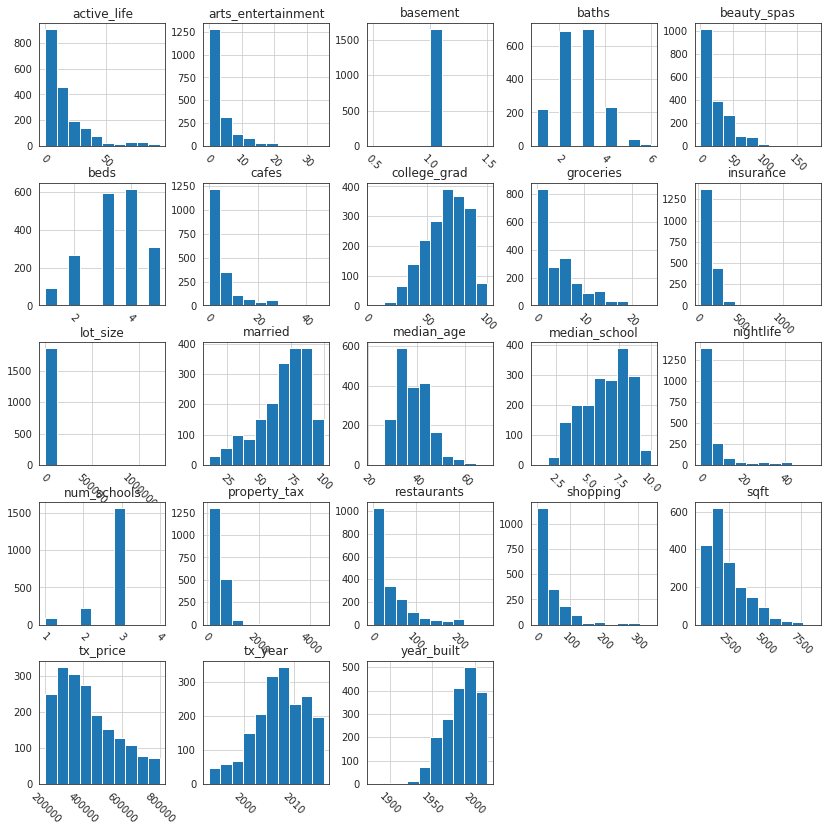

In [176]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

# Categories

In [177]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


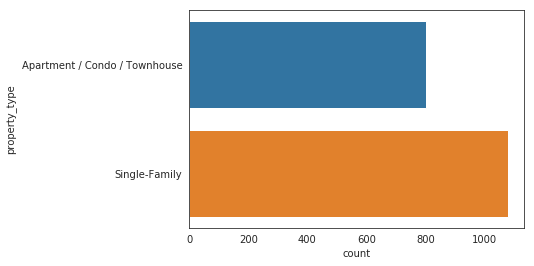

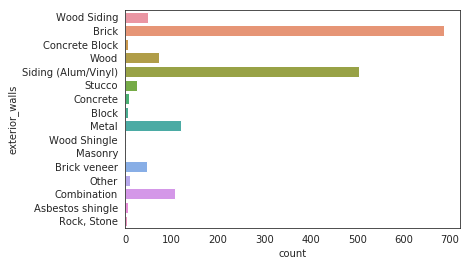

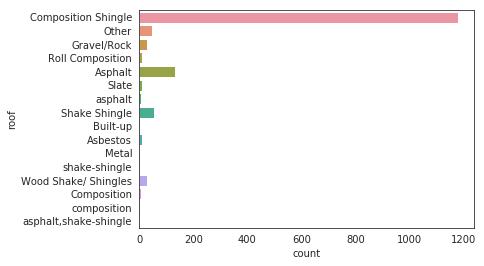

In [178]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

# Segmentations

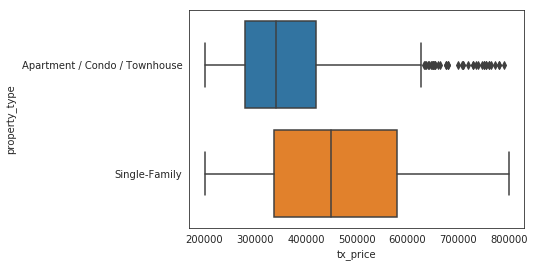

In [179]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

In [180]:
# Segment by property_type and display the average means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.035,2.601,2.200,1513.727,1988.936,3944.239,1.000,58.418,5.919,7.856,8.037,57.631,4.841,32.087,22.411,37.199,57.534,66.372,346.262,105.653,6.382,2.832,2007.941
Single-Family,464644.711,4.030,2.862,2935.866,1978.523,20417.667,1.000,26.672,3.454,3.007,3.308,28.290,2.319,16.970,10.946,39.644,77.685,64.129,556.383,166.330,6.593,2.765,2006.494


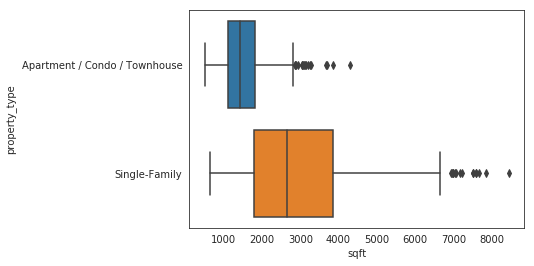

In [181]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(y='property_type', x='sqft', data=df)

* single family homes have bigger footprints on average
* the variance in size also larger in single-family homes
* This makes sense that prices also have the same distribution differences

In [182]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg(['mean', 'std'])

tx_price             beds       baths        \
                                    mean        std  mean   std  mean   std   
property_type                                                                 
Apartment / Condo / Townhouse 366614.035 121784.490 2.601 0.810 2.200 0.815   
Single-Family                 464644.711 157758.739 4.030 0.796 2.862 0.938   

                                  sqft          year_built         lot_size  \
                                  mean      std       mean    std      mean   
property_type                                                                 
Apartment / Condo / Townhouse 1513.727  556.287   1988.936 15.514  3944.239   
Single-Family                 2935.866 1422.871   1978.523 22.211 20417.667   

                                        basement       restaurants         \
                                    std     mean   std        mean    std   
property_type                                                               
Apartment / Condo / Townhouse 44284.169    1.000 0.000      58.418 54.344   
Single-Family                 44165.529    1.000 0.000      26.672 34.726   

                              groceries       nightlife        cafes        \
                                   mean   std      mean    std  mean   std   
property_type                                                                
Apartment / Condo / Townhouse     5.919 4.646     7.856 10.644 8.037 9.077   
Single-Family                     3.454 4.067     3.007  5.544 3.308 5.325   

                              shopping        arts_entertainment        \
                                  mean    std               mean   std   
property_type                                                            
Apartment / Condo / Townhouse   57.631 61.852              4.841 5.235   
Single-Family                   28.290 42.292              2.319 3.930   

                              beauty_spas        active_life         \
                                     mean    std        mean    std   
property_type                                                         
Apartment / Condo / Townhouse      32.087 26.910      22.411 21.058   
Single-Family                      16.970 22.872      10.946 12.599   

                              median_age       married        college_grad  \
                                    mean   std    mean    std         mean   
property_type                                                                
Apartment / Condo / Townhouse     37.199 6.907  57.534 20.373       66.372   
Single-Family                     39.644 6.226  77.685 13.868       64.129   

                                     property_tax         insurance         \
                                 std         mean     std      mean    std   
property_type                                                                
Apartment / Condo / Townhouse 17.096      346.262 142.292   105.653 47.118   
Single-Family                 16.790      556.383 244.352   166.330 77.816   

                              median_school       num_schools        tx_year  \
                                       mean   std        mean   std     mean   
property_type                                                                  
Apartment / Condo / Townhouse         6.382 1.942       2.832 0.455 2007.941   
Single-Family                         6.593 2.032       2.765 0.538 2006.494   

                                     
                                std  
property_type                        
Apartment / Condo / Townhouse 4.099  
Single-Family                 5.807

# Correlations

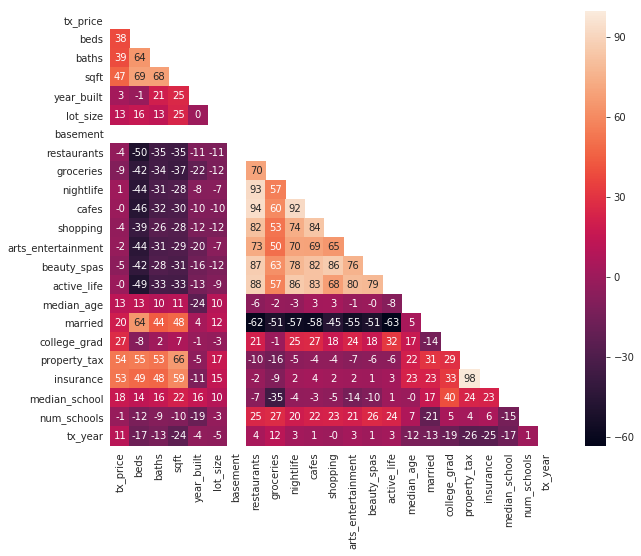

In [183]:
correlations = df.corr()
# Change color scheme
sns.set_style("white")

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

#Mask
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot heatmap of correlations, masked top right, and remove cross correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)

# Data Cleaning

In [184]:
#remove duplicates
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


In [185]:
# fill missing basement values  0
df['basement'] = df.basement.fillna(0)
# Display unique values of 'basement'
df.basement.unique()

array([0., 1.])

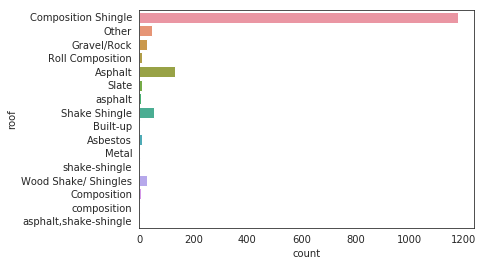

In [186]:
#check for misspellings
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

In [187]:
# composition : Composition, asphalt: Asphalt, shake-shingle: Shake Shingle

df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

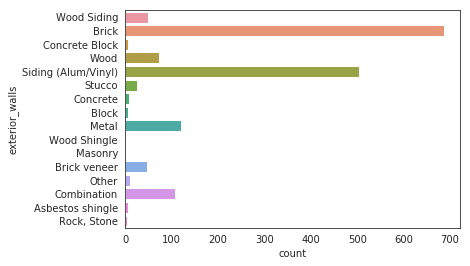

In [188]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

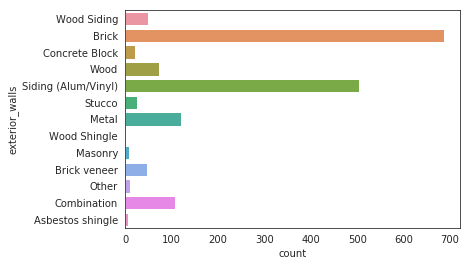

In [189]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

# Remove Outliers

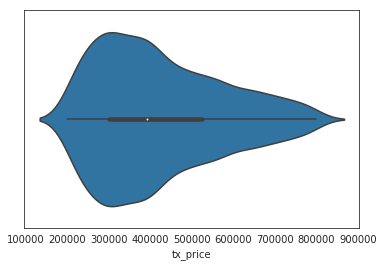

In [190]:
# Plot Target Variable 'tx_price' checkfor outliers
sns.violinplot(df.tx_price)
plt.show()

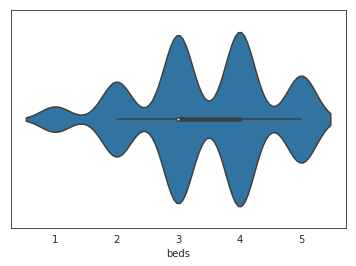

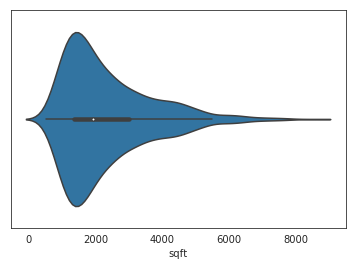

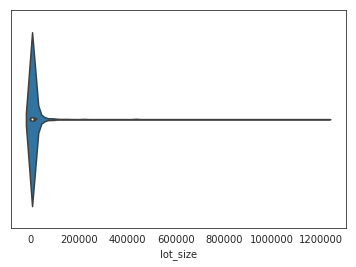

In [191]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [192]:
#lotsize might have issues with outliers, check top values
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [193]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]

# print length of df
print( len(df) )

1882


In [194]:
# check for missing data labels
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [195]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')
# Display number of missing values by category
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [196]:
# Final Check Display number of missing values by feature
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [197]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)

# Enginner Features

In [198]:
# Load cleaned dataset
df = pd.read_csv('cleaned_df.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,2002


In [199]:
#create indicator for 2bds 2bths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [200]:
# Display percent for 2bds 2bths
df.two_and_two.mean()

0.09458023379383634

In [201]:
#During recession
# Create indicator feature for transactions between 2010 and 2013, inclusive
#df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

# Create new Features for Model Training
* Property Age

In [202]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built
# Number of observations with 'property_age' < 0
print( sum(df.property_age < 0) )

19


In [203]:
# Remove rows where property_age is less than 0 ( not built yet)
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print( len(df) )


1863


* Number of nearby schools 

In [204]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school
# Display median school score
df.school_score.median()

18.0

# Regroup Classes with low samples

In [205]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [206]:
# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

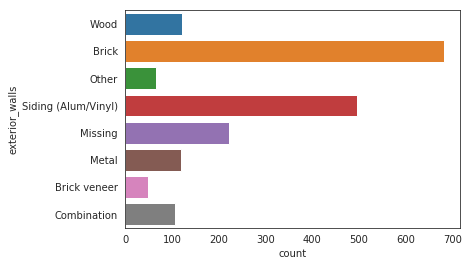

In [207]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

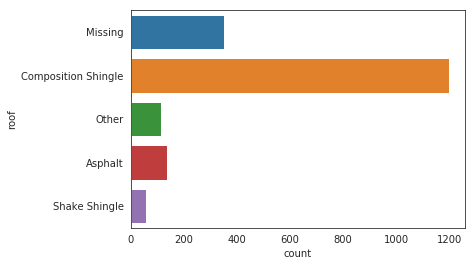

In [208]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)
# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)
# Bar plot for roof
sns.countplot(y='roof', data=df)

# Encode Dummy Varialbles

In [209]:
# Create new dataframe with dummy features
#Dummy variables are a set of binary (0 or 1) features that each represent 
#a single class from a categorical feature
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [210]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,2013,0,0,27.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,2006,0,41,9.000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,2012,0,49,24.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,2005,0,5,27.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,2002,0,10,27.000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [211]:
# Save analytical base table
# Drop 'tx_year' and 'year_built' from the dataset
#df = df.drop(['tx_year', 'year_built'], axis=1)
df = df.drop(['year_built'], axis=1)
df.to_csv('Train_dataset.csv', index=None)


In [212]:
print(df.shape)

(1863, 40)


# Regression Modeling

In [213]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

#import Libraries
# Scikit-Learn for Modeling
import sklearn
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [219]:
# Load Dataset
df = pd.read_csv('Train_dataset.csv')
#pd.read_csv('backup_analytical_base_table.csv')
print(df.shape)

(1863, 40)


In [220]:
df.dtypes

tx_price                                         int64
beds                                             int64
baths                                            int64
sqft                                             int64
lot_size                                         int64
basement                                       float64
restaurants                                      int64
groceries                                        int64
nightlife                                        int64
cafes                                            int64
shopping                                         int64
arts_entertainment                               int64
beauty_spas                                      int64
active_life                                      int64
median_age                                     float64
married                                        float64
college_grad                                   float64
property_tax                                   float64
insurance 

## 1. Split Dataset for Train Test

In [216]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

## 2. Build Pipeline
* Preprocess data for training

In [217]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,school_score
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.434,2.579,2322.785,12746.660,0.879,39.496,4.389,5.005,5.186,39.561,3.362,22.909,15.770,38.509,69.471,65.013,464.266,139.610,6.510,2.779,0.093,24.344,17.940
std,1.073,0.930,1297.102,34805.545,0.327,46.986,4.498,8.442,7.443,52.335,4.694,25.724,17.999,6.615,19.865,17.093,227.250,71.511,1.975,0.517,0.290,21.209,6.452
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,3.000
25%,3.000,2.000,1351.000,1542.000,1.000,6.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,59.000,53.250,321.000,94.000,5.000,3.000,0.000,6.000,12.000
50%,4.000,3.000,1913.500,6183.000,1.000,21.000,3.000,2.000,3.000,20.000,2.000,15.000,10.000,38.000,74.000,66.000,426.000,125.000,7.000,3.000,0.000,20.000,18.000
75%,4.000,3.000,3014.750,11761.000,1.000,56.000,7.000,6.000,6.000,50.000,5.000,35.000,21.000,43.000,84.000,78.000,572.000,169.000,8.000,3.000,0.000,38.000,24.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,114.000,30.000


* Need to Standarize my featurs to the same scale by subtracting means and dividing by StdDevs
* This is important because regression algorithms will overemphasize featurs that are on larger numerical
  scales
* this will "center around zero, with unit variance"


In [222]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

ValueError: operands could not be broadcast together with shapes (4470,) (3,) 